In [2]:
import pickle
import os 
import glob
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

with open('../../data/Hazumi_features/Hazumi1911_features_bert_norm.pkl', mode='rb') as f:
    SS_ternary, TS_ternary, sentiment, third_sentiment, persona, third_persona, text, audio,\
    visual, vid = pickle.load(f, encoding='utf-8')

### シングルタスクモデルとマルチタスクモデルの違い1
ユーザごとの性格特性の損失、心象の損失、心象の正解率

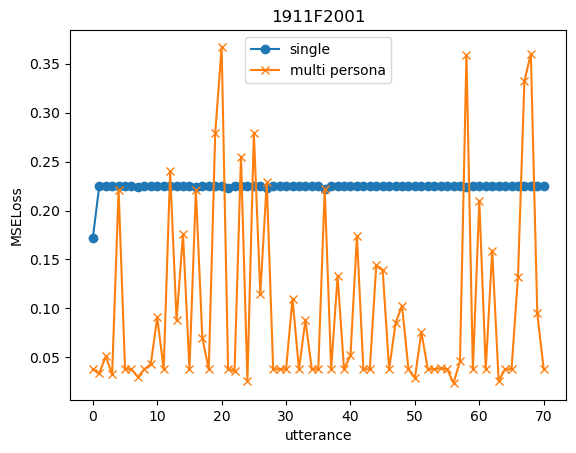

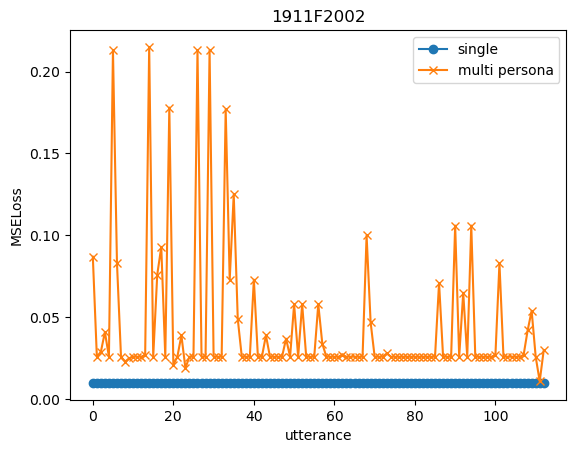

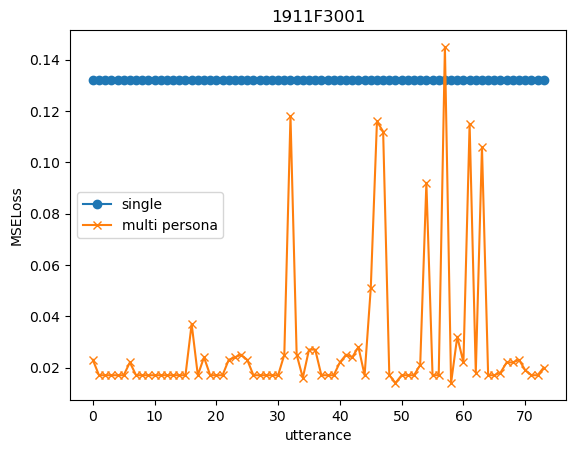

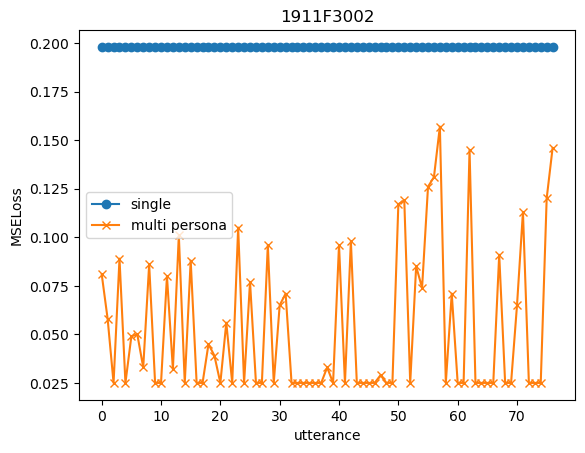

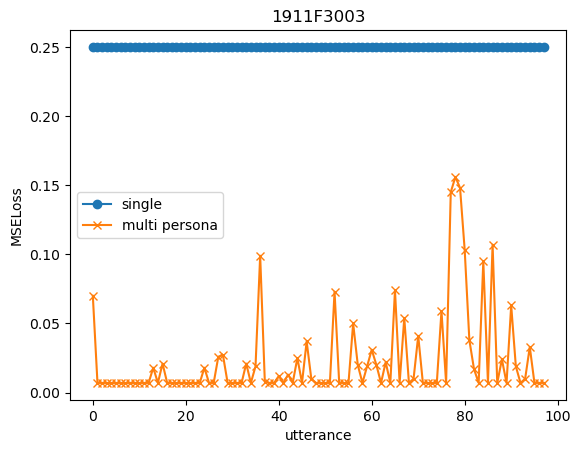

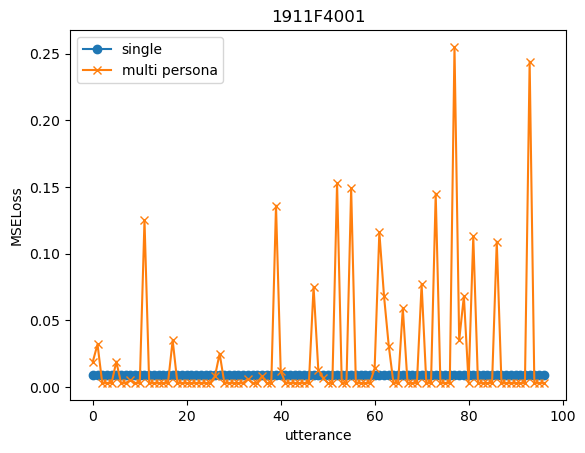

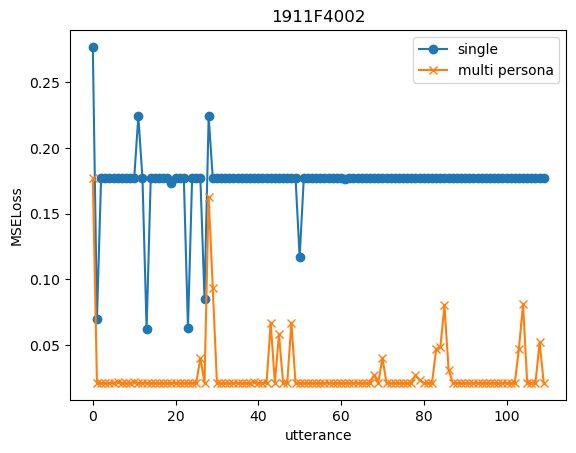

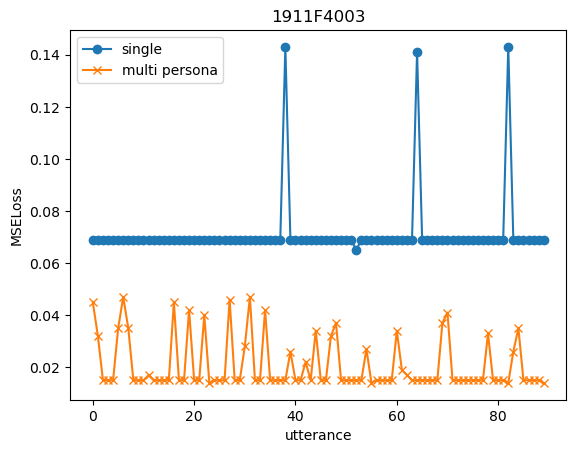

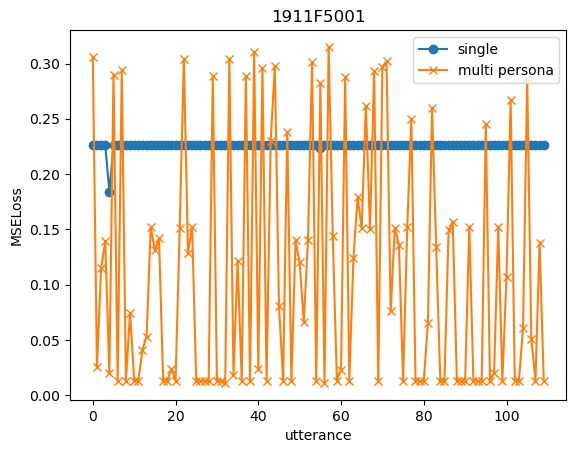

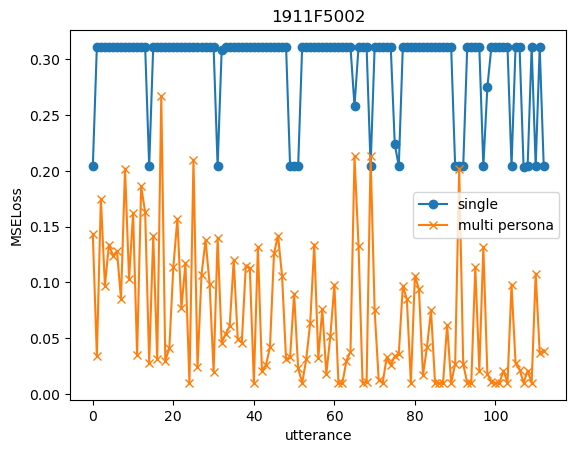

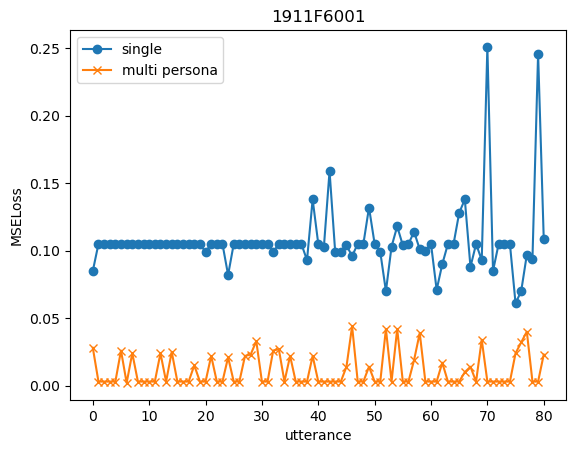

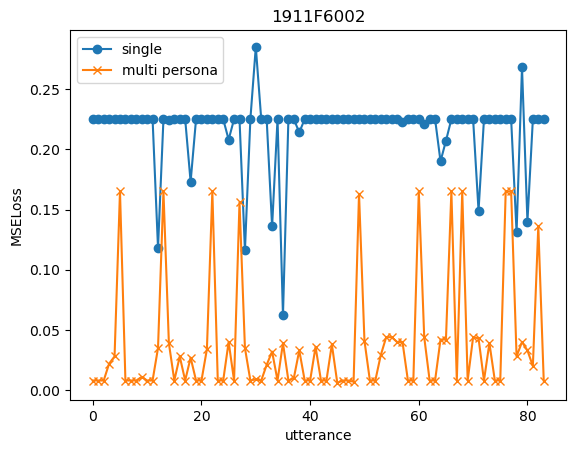

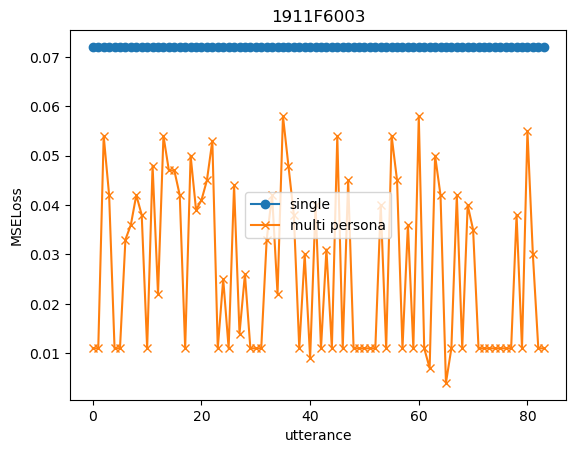

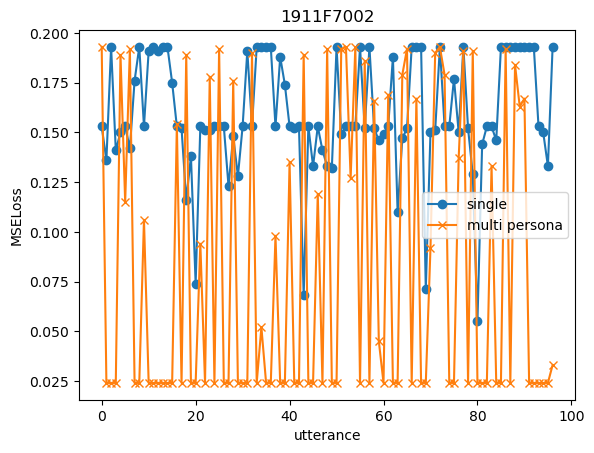

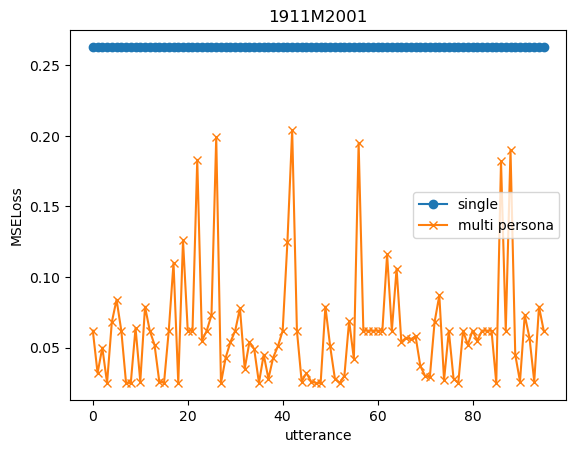

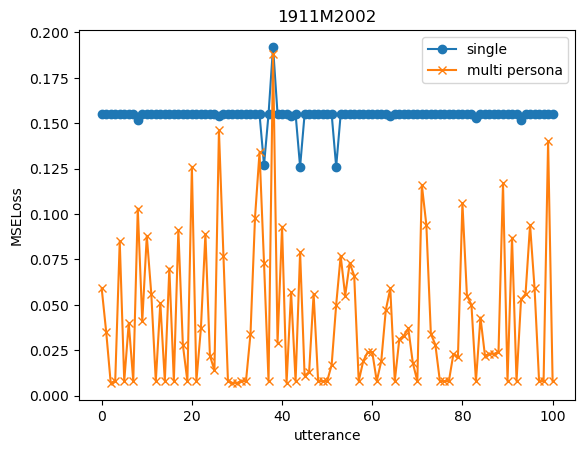

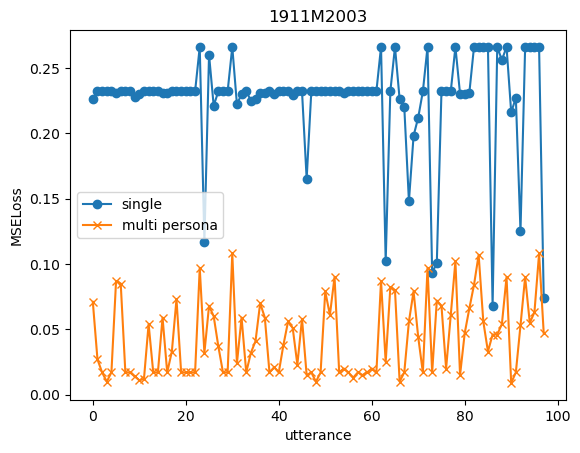

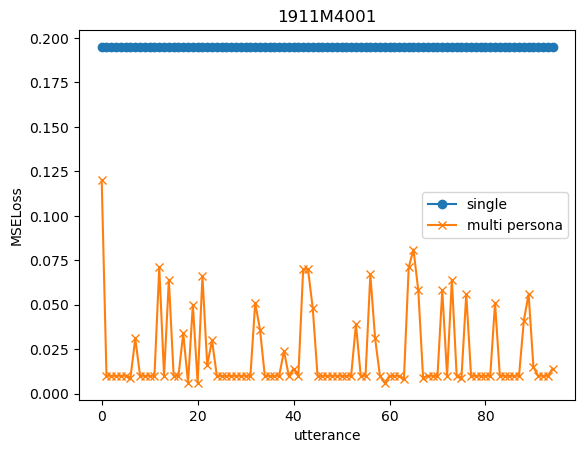

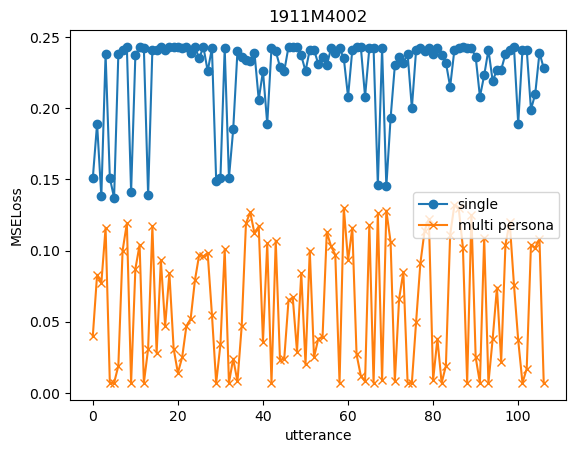

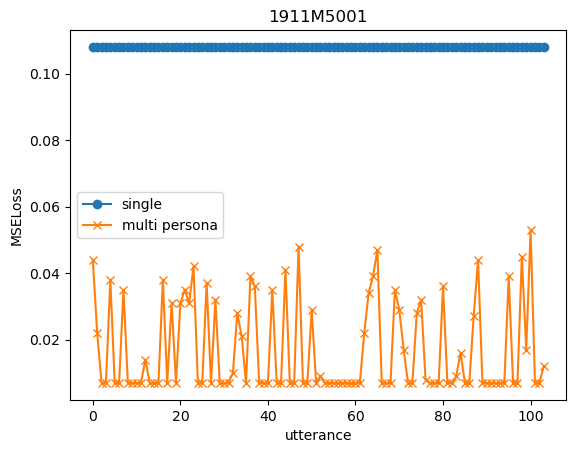

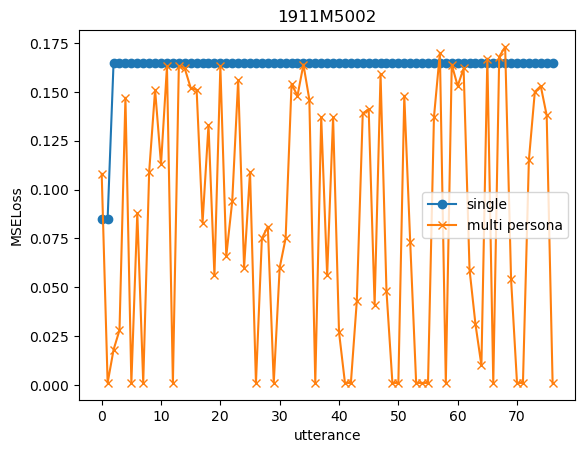

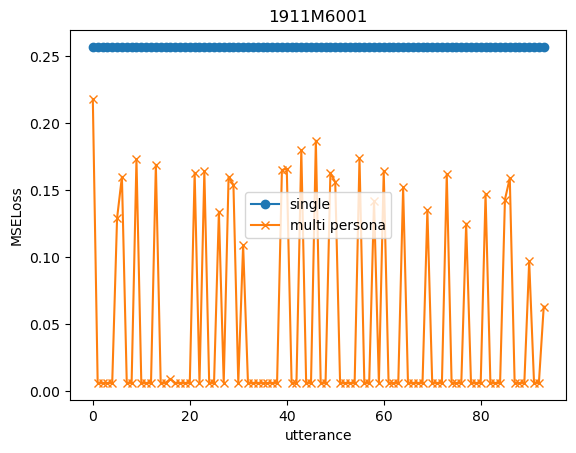

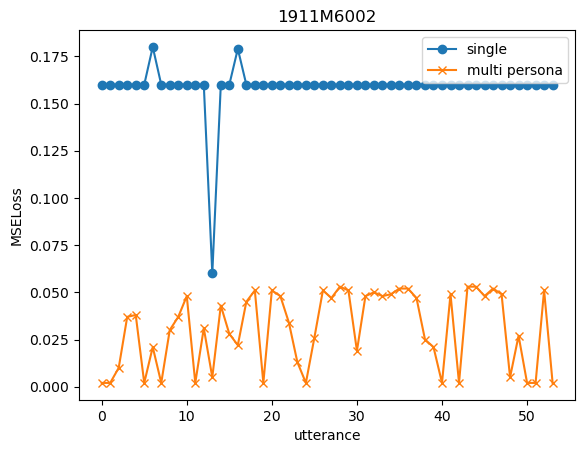

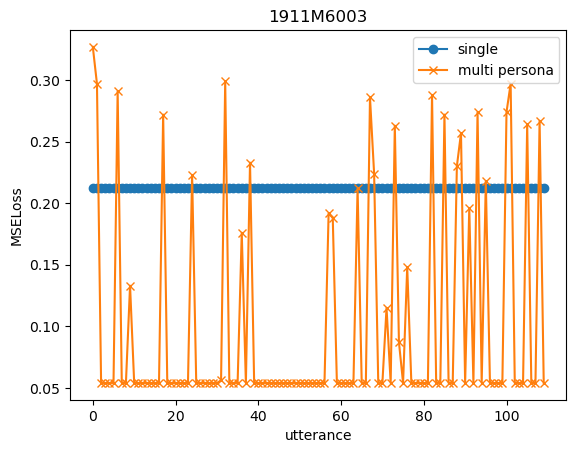

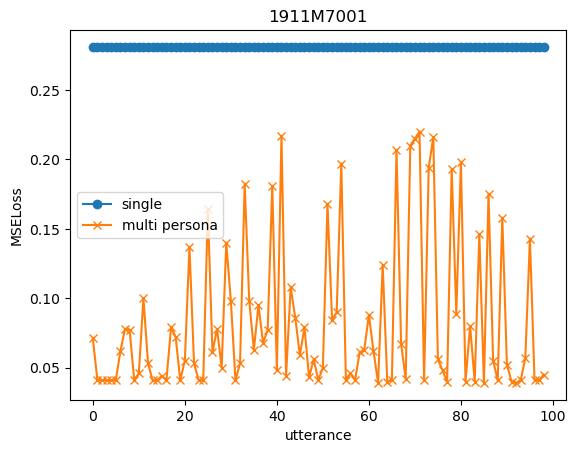

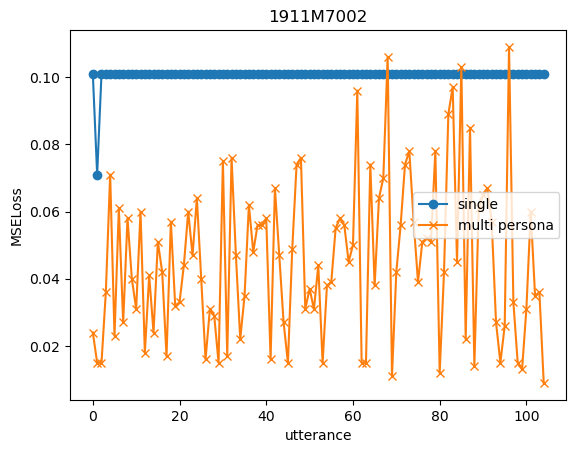

In [5]:
def show_graph(filename, single, multi_persona, multi_sentiment):
    x = list(range(len(single)))
    plt.plot(x, single, label='single', marker='o')
    plt.plot(x, multi_persona, label='multi persona', marker='x')
    # plt.plot(x, multi_sentiment, label='multi sentiment')
    plt.legend() 
    plt.title(filename)
    plt.xlabel('utterance')
    plt.ylabel('MSELoss')
    plt.show()

def show_graphv2(filename, single, multi_persona, multi_sentiment):
    fig = plt.figure() 
    ax1 = fig.subplots()
    ax2 = ax1.twinx()

    x = list(range(len(single)))

    ax1.plot(x, single, label='single', marker='o')
    ax1.plot(x, multi_persona, label='multi persona', marker='x')
    ax2.plot(x, multi_sentiment, label='multi sentiment', color='y')
    ax1.legend(loc='upper left') 
    ax2.legend(loc='upper right')
    plt.title(filename)
    plt.xlabel('utterance')
    plt.ylabel('MSELoss')
    plt.show()

testfiles = []
for f in glob.glob('../../data/Hazumi1911/dumpfiles/*.csv'):
    testfiles.append(os.path.splitext(os.path.basename(f))[0])

testfiles = sorted(testfiles)

for i, testfile in enumerate(testfiles):
    with open(f'../../data/results/{testfile}/multi.csv') as f:
        reader = csv.reader(f)
        multi = [row for row in reader]

    with open(f'../../data/results/{testfile}/single.csv') as f:
        reader = csv.reader(f) 
        single = [row for row  in reader]

    
    single = np.array(single[0]).astype(float)
    multi_persona = np.array(multi[0]).astype(float)
    multi_sentiment = np.array(multi[1]).astype(float)

    show_graph(testfile, single, multi_persona, multi_sentiment)